# Описание проекта:

## Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс. Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**
1. Определить рыночеую стоимость объектов недвижимости;
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность;
3. Установить, какаие факторы влияют на ценообразование стоимости квартир.

**Ход исследования:**
Данные о недвижимости я получу из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.

Таким образом, моё исследование пройдет в семь этапов:
* Обзор данных;
* Предобработка данных;
* Расчеты и добавление результатов в таблицу;
* Проведение анализа для Ленинградской области;
* Проведение анализа для Санкт-Петербурга;
* Различаются ли факторы, которые влияют на ценообразование стоимости квартир;
* Написание общего вывода.

# Обзор данных:

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`:

In [1]:
import pandas as pd # импорт необходимой библиотеки pandas для работы с данными

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') # считаем необходимый файл real_estate_data.csv из папки /datasets и сохраняем его в переменной data
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

Выведем первые 20 строчек датафрейма `data` на экран:

In [3]:
data.head(20) # выведем первые 20 строк датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
data.info() # ознакомимся с данными и посмотрим и количество ненулевых значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выведем количество пропущенных значений для каждого столбца:

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Построим гистограммы по данным столбцов:

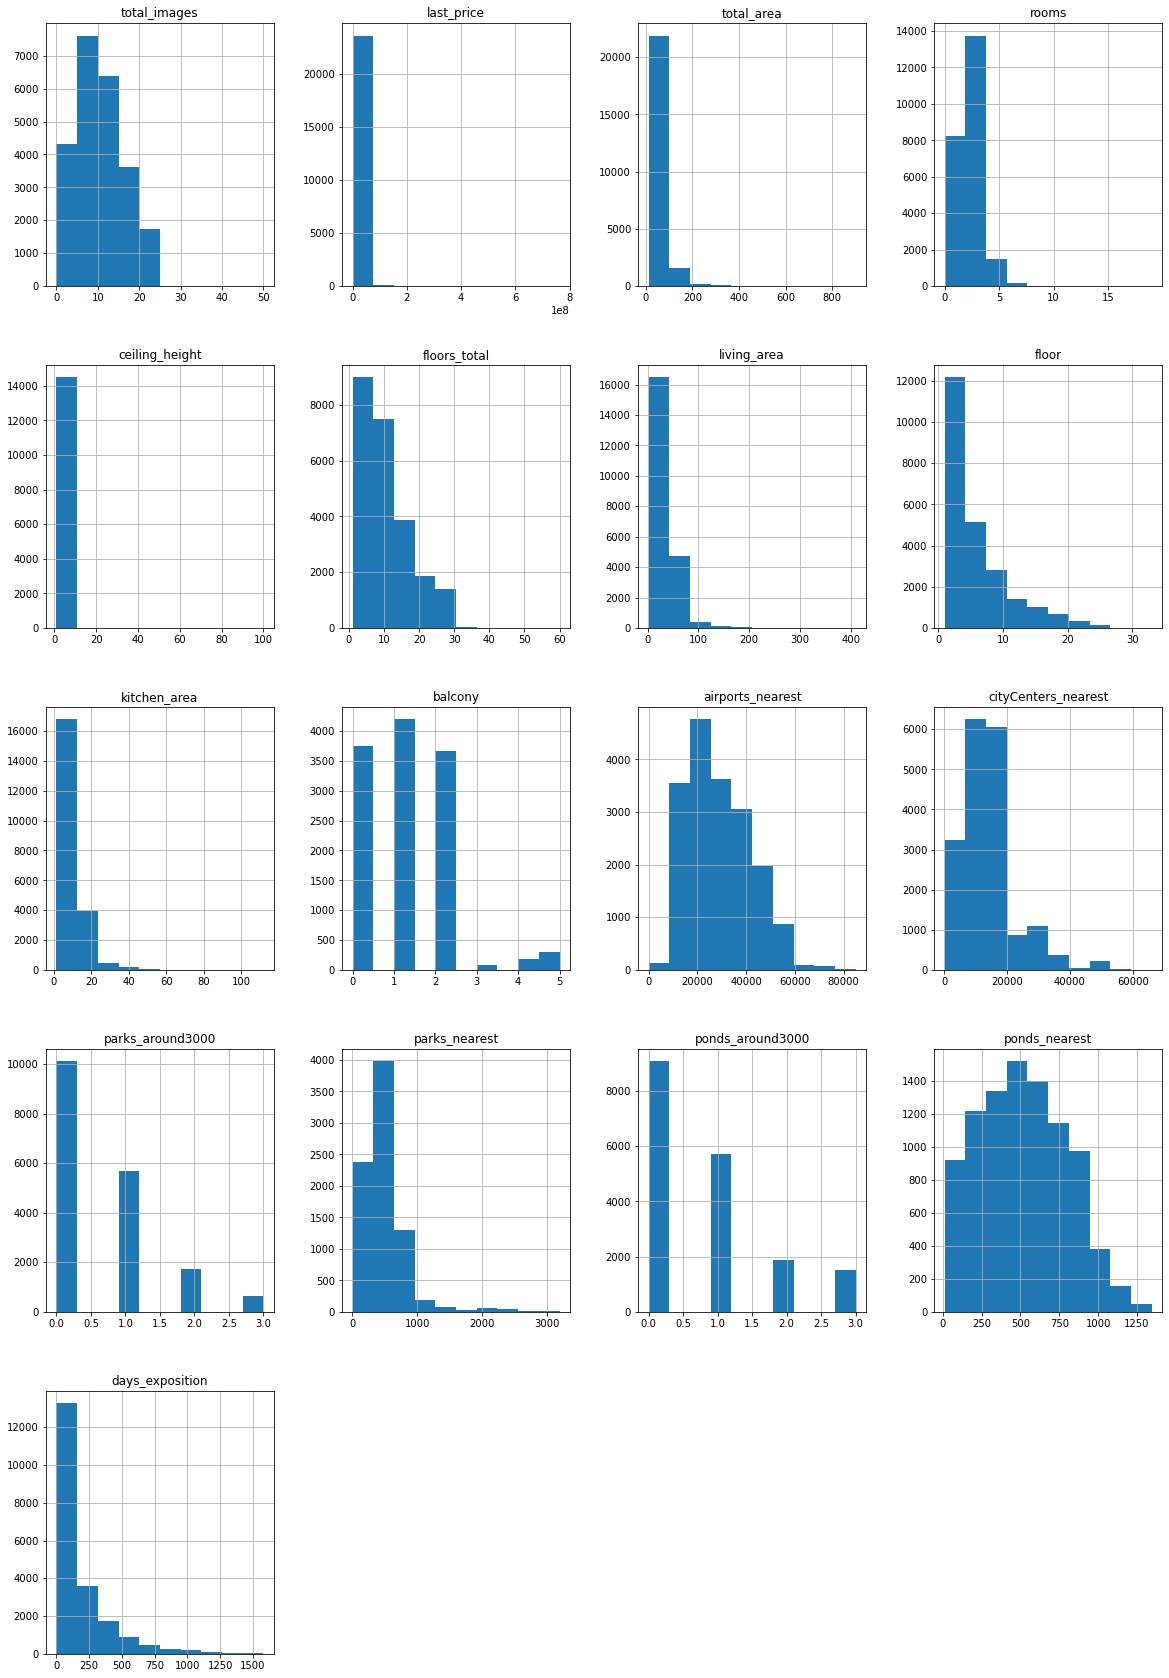

In [6]:
data.hist(figsize = (20, 30));

**Проанализировав данные можно прийти к следующим выводам:**

1. В столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition есть пропущенные значения;
2. столбец last_price должен быть тип int (цена на момент снятия публикации);
3. столбец floors_total должен быть тип int (так как количество этажей это натуральное число);
4. столбец is_apartment должен быть тип bool (так как это либо апартаменты, либо нет, другого тут не может быть);
5. столбец parks_around3000 должен быть тип int (так как число парков в радиусе 3 км это натуральное число);
6. столбец ponds_around3000 должен быть тип int (так как число водоёмов в радиусе 3 км это натуральное число);
7. столбец days_exposition должен быть тип int (так как количество дней это натуральное число);
8. в столбце first_day_exposition формат данных с временем, но нигде время не указано, только число, месяц, год.

# Предобработка данных:

Работа со столбцом last_price (цена на момент снятия публицации):

In [7]:
data['last_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23699 entries, 0 to 23698
Series name: last_price
Non-Null Count  Dtype  
--------------  -----  
23699 non-null  float64
dtypes: float64(1)
memory usage: 185.3 KB


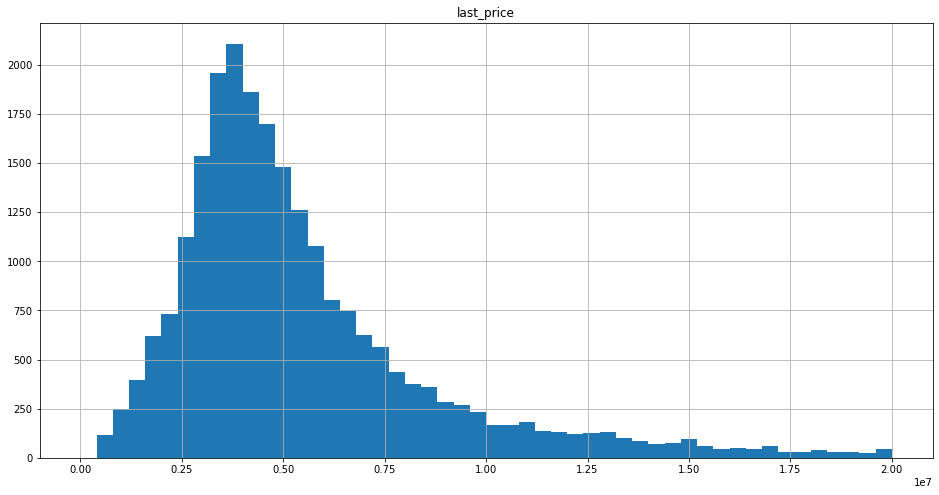

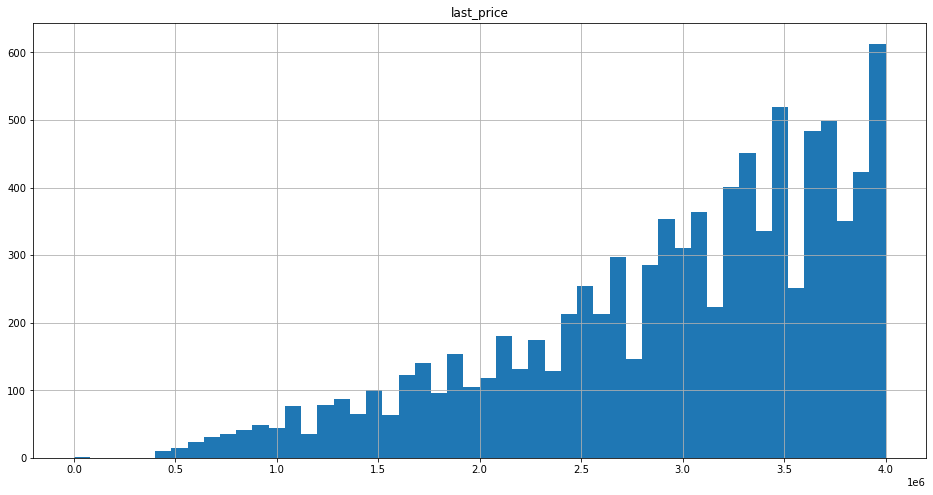

In [8]:
data['last_price'] = data['last_price'].astype('int') # изменим тип данных на int
# нет необходимости знать цену с точностью до копеек

# построим две гистограммы для наглядности
data.hist('last_price', bins = 50, range = (0, 2e+07), figsize = (16, 8));
data.hist('last_price', bins = 50, range = (0, 4e+06), figsize = (16, 8));
data.drop(index = data.query('last_price < 1e+05').index, inplace = True) # удалим аномальные значения (цена менее 100000 руб.)

# из гистограмм делавем вывод, что данные в порядке, устранили выбросы

Работа со столбцом first_day_exposition (дата публикации):

In [9]:
# переведем столбец first_day_exposition в тип без времени, так как время все равно нигде не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Работа со столбцом ceiling_height (высота потолков):

2.50    3522
2.60    1647
2.70    1582
3.00    1112
2.80     993
        ... 
3.44       1
3.98       1
3.83       1
3.68       1
3.59       1
Name: ceiling_height, Length: 133, dtype: int64

count    14374.000000
mean         2.722740
std          0.257166
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

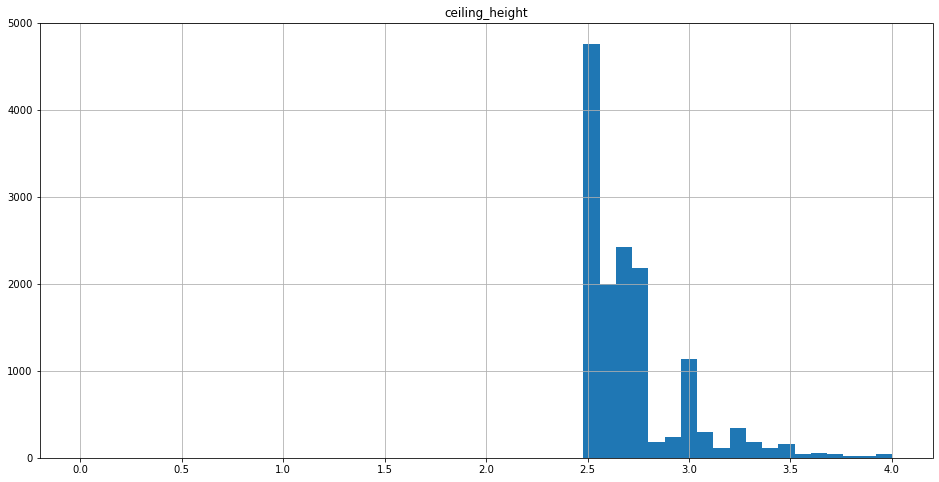

In [10]:
data.drop(index = data.query('ceiling_height > 4 and ceiling_height < 25').index, inplace = True) # удаляем квартиры с высотой потолков от 4 до 25 метров
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height'] / 10) # для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получаем 2.5 и 3.6 метра
data.drop(index = data.query('ceiling_height > 36').index, inplace = True) # удаляем квартиры с высотой потолков от 36 метров
data.drop(index = data.query('ceiling_height < 2.5').index, inplace = True) # удаляем квартиры с высотой потолков до 2.5 метров

display(data['ceiling_height'].value_counts()) # посмотрим колличесвто уникальных значений столбца
display(data['ceiling_height'].describe()) # выведем на экран описательную статистику по стоблцу ceiling_height
# изучим столбец ceiling_height, построим гистрограмму, для того чтобы наглядно оценить данные
data.hist('ceiling_height', bins = 50, range = (0, 4), figsize = (16, 8)); # построение гистограммы по значениям столбца ceiling_height

In [11]:
data['ceiling_height'].median() # вычислим среднее арифметическое по стоблцу ceiling_height
# можно, заметить, что медиана равна 2.65, а среднее арифметическое равно 2.77, эти статистические величины отличаются несельно
# это связано с выбрасами на выборке

2.65

In [12]:
ceiling_medians = data.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ['median', 'count']) # создадим сводную таблицу, сгруппируем по количеству этажей в доме и вычислим медианное значение высоты потолков
ceiling_medians.columns = ['median', 'count'] # переименуем столбцы
display(ceiling_medians) # выведем датафрейм на экран

,median,count
floors_total,,
1.0,2.90,8
2.0,2.70,211
3.0,2.80,390
4.0,3.00,780
5.0,2.55,3616
6.0,3.00,608
7.0,3.00,391
8.0,2.80,217
9.0,2.55,2546


In [13]:
# заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) | 
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = data['ceiling_height'].describe()

In [14]:
# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & 
             (data['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

Работа со столбцом floors_total (всего этажей в доме):

Пропусков в столбце floors_total: 86


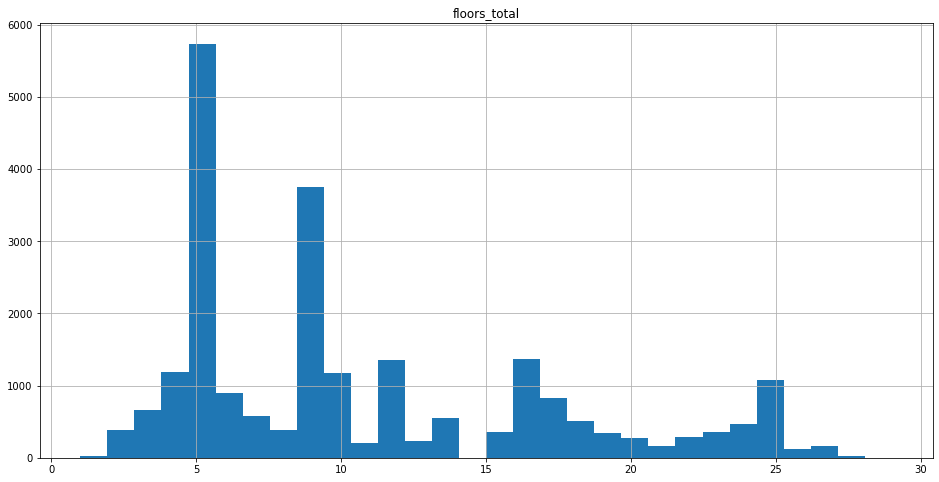

In [15]:
data.drop(index = data.query('floors_total > 30').index, inplace = True) # удалим аномальные данные, где более 30 этажей в доме(их очень мало, и не повлияют на результат)
data['floors_total'].dropna(inplace = True)
data.hist('floors_total', bins = 30, figsize = (16, 8)) # построим гистограмму
print('Пропусков в столбце floors_total:', data['floors_total'].isna().sum())

86 пропусков в столбце floors_total, это немного и не представляется возможным их убрать.

Работа со столбцом living_area (жилая площадь в квадратных метрах):

1890

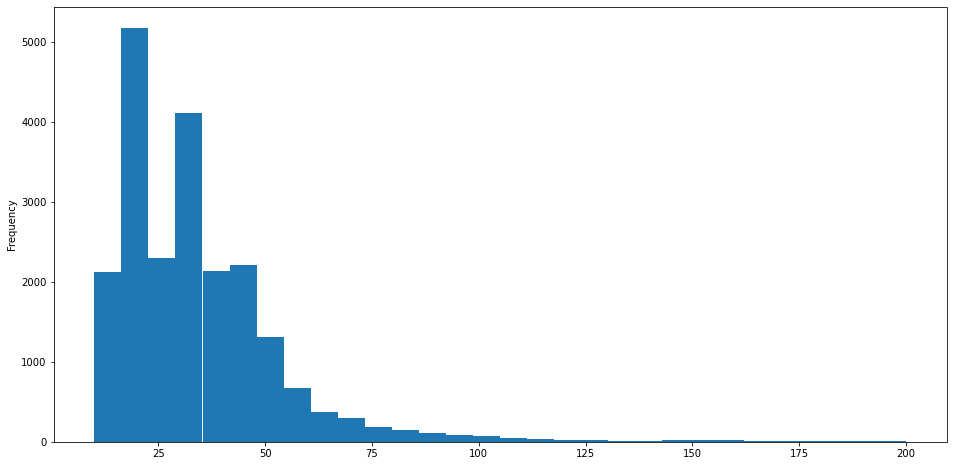

In [16]:
data.drop(index = data.query('living_area < 10').index, inplace = True) # удалим квартиры с площадью менее 10 кв. м.
data.drop(index = data.query('living_area > 200').index, inplace = True) # удалим квартиры с площадью более 200 кв. м.
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 30, figsize = (16, 8)) # построим гистограмму
display(data['living_area'].isna().sum())

Работа со столбцом is_apartment (апартаменты):

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False) # исправим столбец is_apartment, все пропущенные значения заменим на False

Работа со столбцом kitchen_area (площадь кухни в квадратных метрах):

2254

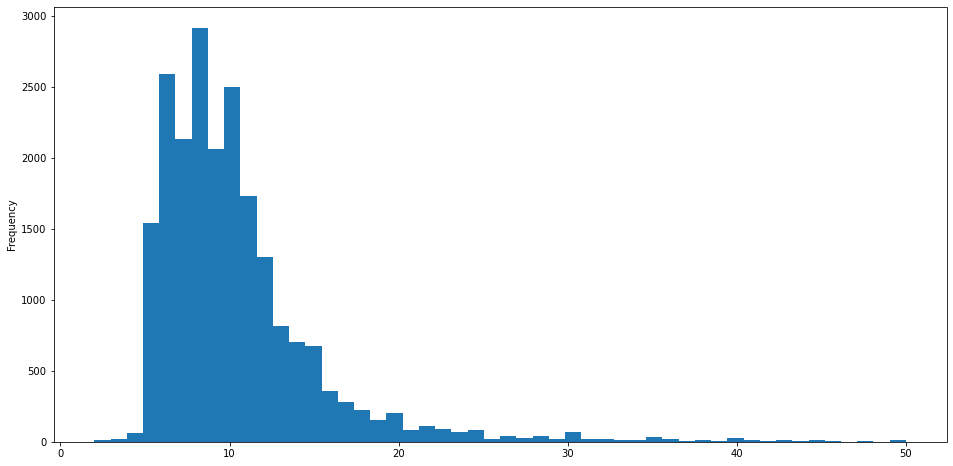

In [18]:
data.drop(index = data.query('kitchen_area < 2').index, inplace = True) # удалим строки, где кухни менее 2 кв. м.
data.drop(index = data.query('kitchen_area > 50').index, inplace = True) # удалим строки, где кухни более 50 кв. м.
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 50, figsize = (16, 8)) # построим гистограмму
display(data['kitchen_area'].isna().sum())

Работа со столбцом balcony (число балконов):

1.0    4145
0.0    3727
2.0    3623
5.0     298
4.0     180
3.0      78
Name: balcony, dtype: int64

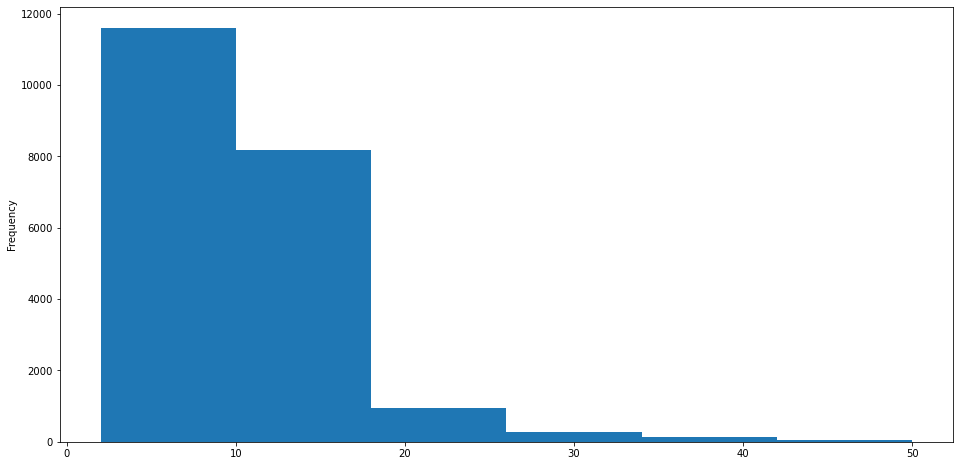

In [19]:
display(data['balcony'].value_counts()) # посмотрим колличесвто уникальных значений столбца balcony
data['balcony'] = data['balcony'].fillna(0) # заменим пропуски в balcony на 0
data['balcony'] = data['balcony'].astype('int') # изменим тип данных на int
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 6, figsize = (16, 8)); # построим гистограмму

Работа со столбцом locality_name (название насиленного пункта):

In [20]:
display(data['locality_name'].value_counts()) # посмотрим колличесвто уникальных значений столбца locality_name
display(data['locality_name'].isna().sum()) # посмотрим количество пропущенных значений столбца locality_name
# устранить пропущенные значения в столбце locality_name нет возможности, причина пропусков не ясна
data['locality_name'].dropna(inplace = True) # удалем строки с Null

Санкт-Петербург                   15523
посёлок Мурино                      521
посёлок Шушары                      439
Всеволожск                          396
Пушкин                              361
                                  ...  
поселок Гладкое                       1
посёлок городского типа Рябово        1
поселок Цвылёво                       1
поселок городского типа Рябово        1
посёлок Дзержинского                  1
Name: locality_name, Length: 363, dtype: int64

49

In [21]:
display(data['locality_name'].unique().shape[0])
data['locality_name'] = data['locality_name'].str.lower() # приводим всё к нижнему регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') # заменяем все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа') # заменяем "городской поселок" на "поселок городского типа"
print('Количетво явных дубликатов:', data.duplicated().sum()) # выведем на экран количество явных дубликатов

364

Количетво явных дубликатов: 0


Работа со столбцом airports_nearest (расстояние до ближайщего аэропорта в метрах):

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
23338.0     1
16282.0     1
12655.0     1
23322.0     1
24665.0     1
Name: airports_nearest, Length: 8214, dtype: int64

5500

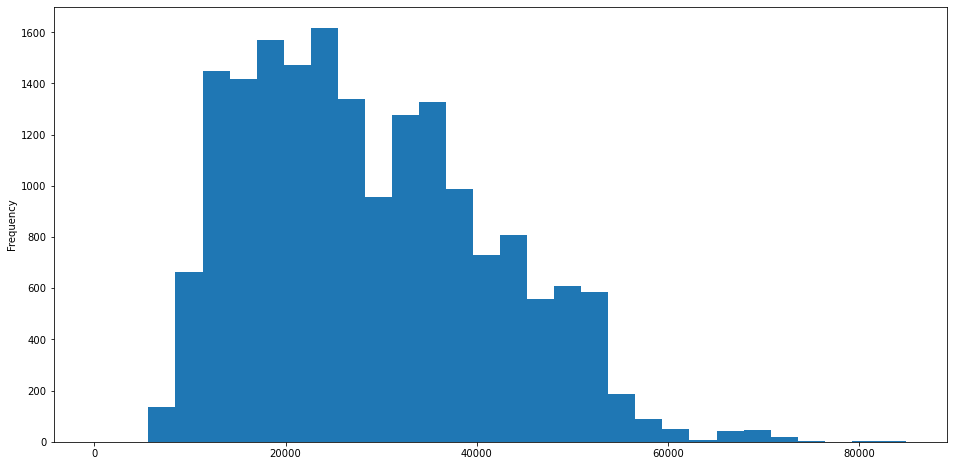

In [22]:
display(data['airports_nearest'].value_counts()) # посмотрим колличесвто уникальных значений столбца airports_nearest
display(data['airports_nearest'].isna().sum()) # посмотрим количество пропущенных значений столбца airports_nearest
data['airports_nearest'].sort_values().plot(y = 'airports_nearest', kind = 'hist', bins = 30, figsize = (16, 8)); # построим гистограмму

Работа со столбцом cityCenters_nearest (расстояние до центра города в метрах):

8460.0     61
20802.0    32
10720.0    30
8434.0     27
8370.0     26
           ..
1628.0      1
12574.0     1
6377.0      1
4144.0      1
6263.0      1
Name: cityCenters_nearest, Length: 7582, dtype: int64

5480

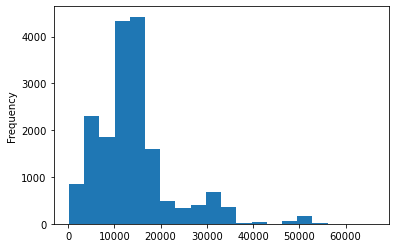

In [23]:
display(data['cityCenters_nearest'].value_counts()) # посмотрим колличесвто уникальных значений столбца cityCenters_nearest
display(data['cityCenters_nearest'].isna().sum()) # посмотрим количество пропущенных значений столбца cityCenters_nearest
data['cityCenters_nearest'].sort_values().plot(y = 'cityCenters_nearest', kind = 'hist', bins = 20) # построим гистограмму
# значения выше 25 км быть не может, так как самый большой город по диагонали это Москва, она равна 50 км
data.rename(columns = {'cityCenters_nearest' : 'city_centers_nearest'}, inplace = True) # переименуем столбец 

Работа со столбцом parks_around3000 (число парков в радиусе 3 км):

0.0    15492
1.0     5617
2.0     1703
3.0      634
Name: parks_around3000, dtype: int64

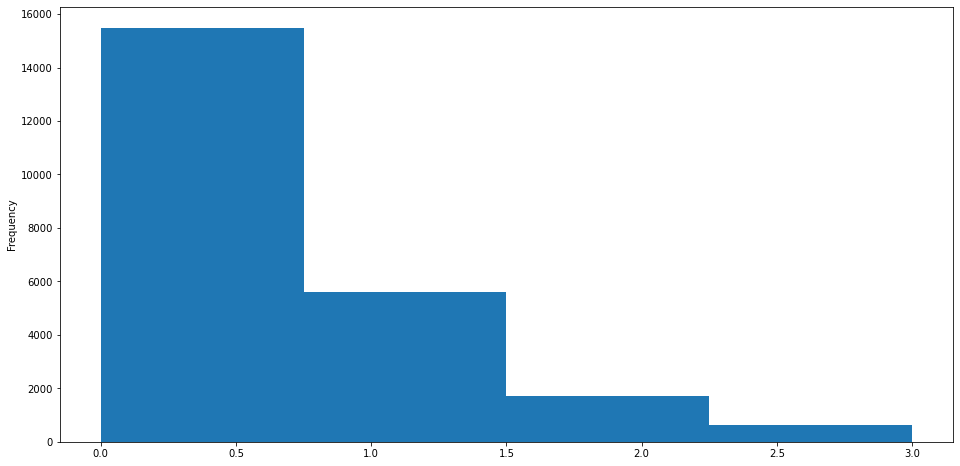

In [24]:
data['parks_around3000'] = data['parks_around3000'].fillna(0) # заменим пропуски в столбце parks_around3000 на 0
display(data['parks_around3000'].value_counts()) # посмотрим колличесвто уникальных значений столбца parks_around3000
data['parks_around3000'].sort_values().plot(y = 'parks_around3000', kind = 'hist', bins = 4, figsize = (16, 8)); # построим гистограмму по значениям столбца
# из гистограммы видно, что аномальных значений нет, изменять данные больше не требуется

Работа со столбцом parks_nearest (расстояние до ближайшего парка в метрах):

441.0     67
392.0     41
456.0     40
173.0     39
471.0     32
          ..
873.0      1
859.0      1
1150.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 991, dtype: int64

15488

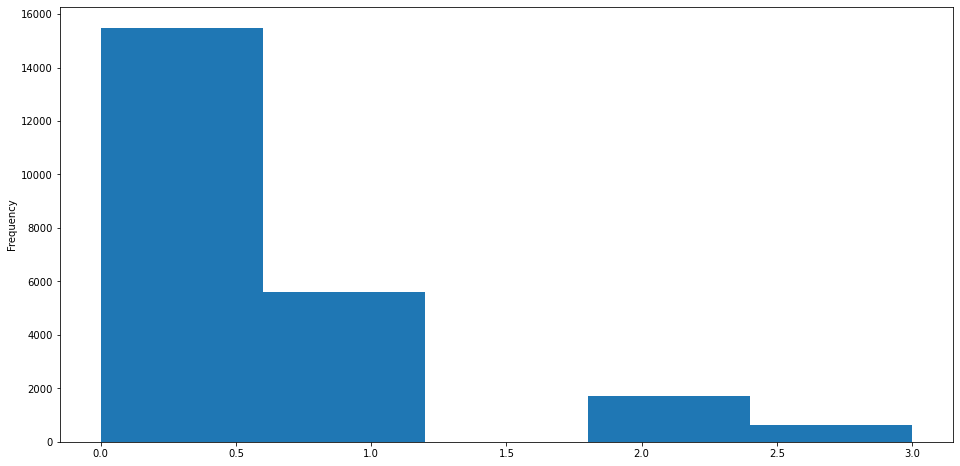

In [25]:
display(data['parks_nearest'].value_counts()) # посмотрим колличесвто уникальных значений столбца parks_nearest
display(data['parks_nearest'].isna().sum()) # посмотрим количество пропущенных значений столбца parks_nearest
data['parks_around3000'].sort_values().plot(y = 'parks_around3000', kind = 'hist', bins = 5, figsize = (16, 8)); # построим гистограмму по значениям столбца

Работа со столбцом ponds_around3000 (число водоёмов в радиусе 3 километрах):

0.0    14476
1.0     5665
2.0     1867
3.0     1438
Name: ponds_around3000, dtype: int64

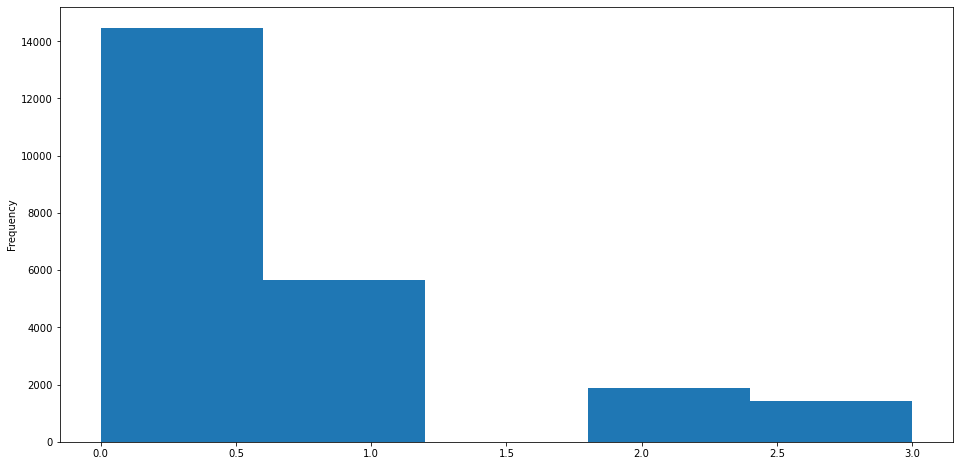

In [26]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) # заменим пропуски в столбце ponds_around3000 на 0
display(data['ponds_around3000'].value_counts()) # посмотрим колличесвто уникальных значений столбца ponds_around3000
data['ponds_around3000'].sort_values().plot(y = 'ponds_around3000', kind = 'hist', bins = 5, figsize = (16, 8)); # построим гистограмму по значениям столбца
# из гистограммы видно, что аномальных значений нет, изменять данные больше не требуется

Работа со столбцом ponds_nearest (расстояние до ближайшего водоёма в метрах):

427.0     70
454.0     41
153.0     40
433.0     39
564.0     37
          ..
889.0      1
1253.0     1
1024.0     1
150.0      1
1134.0     1
Name: ponds_nearest, Length: 1095, dtype: int64

14476

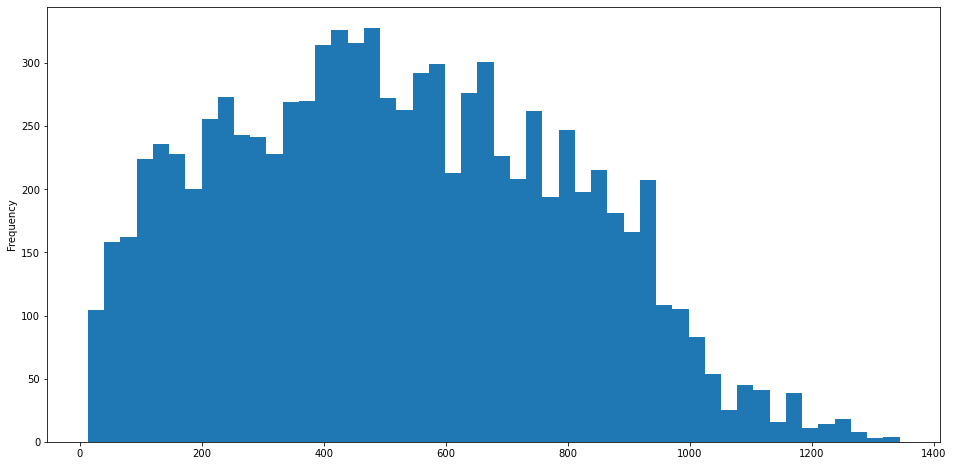

In [27]:
display(data['ponds_nearest'].value_counts()) # посмотрим колличесвто уникальных значений столбца ponds_nearest
display(data['ponds_nearest'].isna().sum()) # посмотрим количество пропущенных значений столбца ponds_nearest
data['ponds_nearest'].sort_values().plot(y = 'ponds_nearest', kind = 'hist', bins = 50, figsize = (16, 8)); # построим гистограмму по значениям столбца

Работа со столбцом days_exposition (количество дней размещенного объявления):

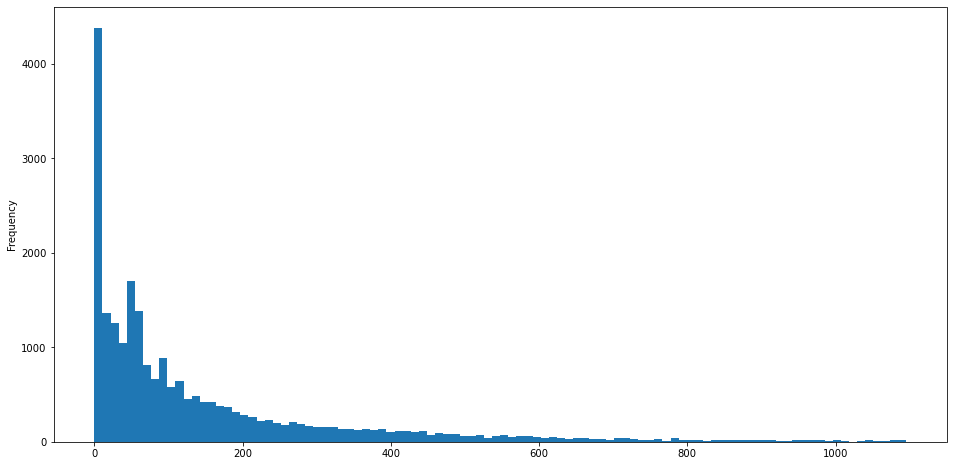

In [28]:
data['days_exposition'] = data['days_exposition'].fillna(0) # заменим пропуски на 0
data['days_exposition'] = data['days_exposition'].astype('int') # изменим тип данных на int
data.drop(index = data.query('days_exposition > 365*3').index, inplace = True) # удалим объявления, которые висели более трех лет
data['days_exposition'].sort_values().plot(y = 'days_exposition', kind = 'hist', bins = 100, figsize = (16, 8)) # построим гистограмму по значениям столбца
data.reset_index(drop = True, inplace = True) # сбросим индексацию после удаления строк

**Вывод:** исходные данные в целом были предоставлены хорошие, но все же, нуждались в немалой предварительной обработке (было довольно много пропусков, которые ни так сложно устраняются), чтобы в дальнейшем получить более верные выводы. После проведенной работы были устранены аномальные значения, выбивающиеся из общей картины данных, проведена работа по устранению дубликатов и нулевых значений.

## Посчитаем и добавьте в таблицу новые столбцы:

**Необходимо рассчитать и добавить в таблицу следующие параметры:**
1. Цена одного квадратного метра;
2. день публикации объявления (0 - понедельник, 1 - вторник и т.д.);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «первый», «последний», «другой»);
6. расстояние в км до центра города.

**1. Расчет цены квадратного метра и добавление нового столбца в дата фрейм:**

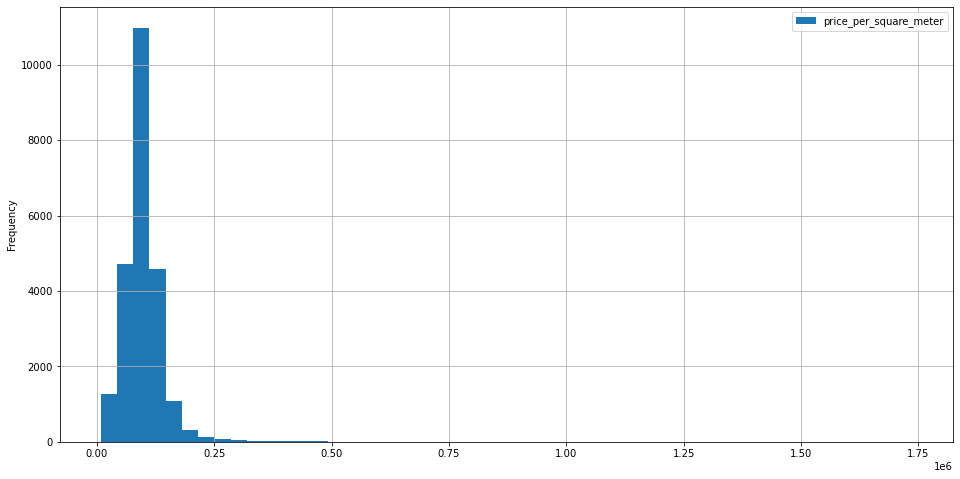

In [29]:
data['price_per_square_meter'] = data['last_price'] / data['total_area'] # посчитаем цену за квадратный метр, для этого поделим цену на площадь
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int') # изменим тип данных на int
data.plot(y = 'price_per_square_meter', kind = 'hist', bins = 50, grid = True, figsize = (16, 8)); # построим гистограмму по значениям столбца

**2. Добавление столбца дня публикации объявления:**

In [30]:
data['day_publication'] = data['first_day_exposition'].dt.weekday # создаем столбец дня недели

**3. Добавление столбца месяца публикации объявления:**

In [31]:
data['month_publication'] = data['first_day_exposition'].dt.month # создаем столбец месяца

**4. Добавление столбца года публикации объявления:**

In [32]:
data['year_publication'] = data['first_day_exposition'].dt.year # создаем столбец года

**5. Добавление столбца с типом этажа квартиры:**

In [33]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis = 1)

**6. Добавление столбца с расстоянием в км до центра города:**

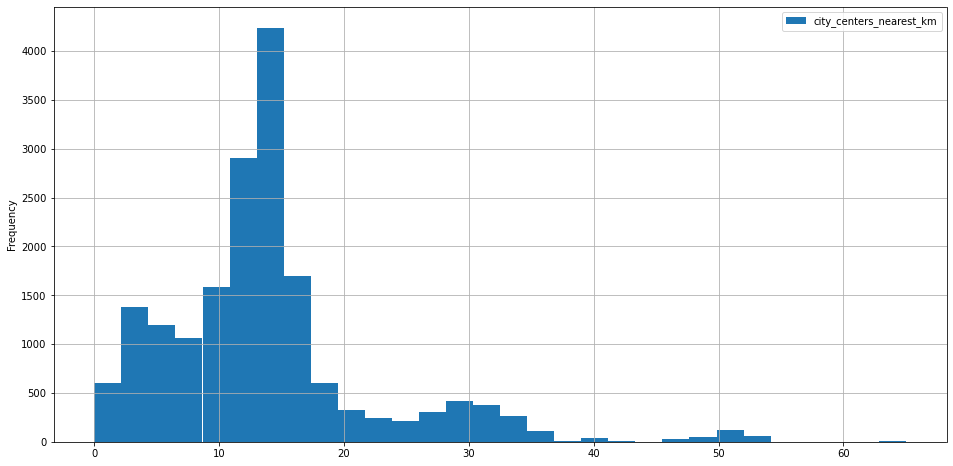

In [34]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] // 1000 # поделим на 1000, чтобы получить километры
data.plot(y = 'city_centers_nearest_km', kind = 'hist', bins = 30, grid = True, figsize = (16, 8)); # построим гистограмму по значениям столбца

### Проведем исследовательский анализ данных:

Изучение общей площади:

count    23280.000000
mean        59.439509
std         31.737819
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        500.000000
Name: total_area, dtype: float64

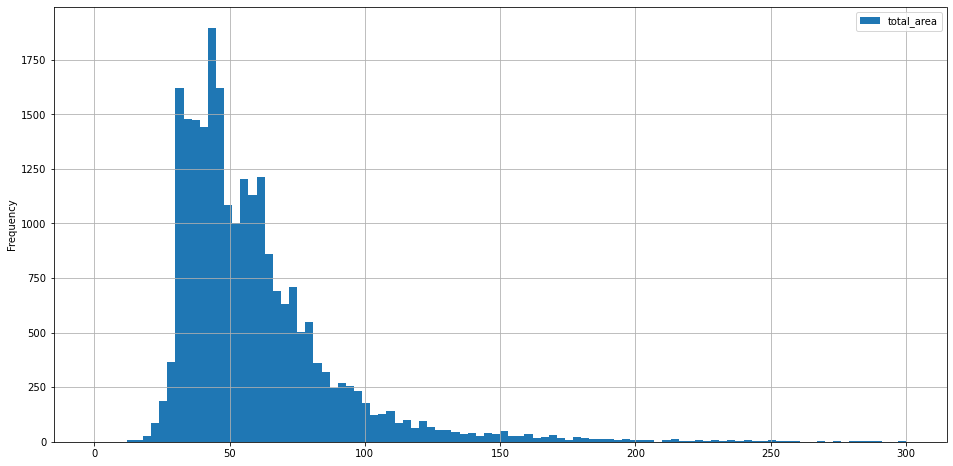

In [35]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid = True, range = (0, 300), figsize = (16, 8)) # построим гистограмму по значениям столбца
data['total_area'].describe() # выведем описательную статистику
# Распределение данных в целом нормальное. Можно наблюдать очень малое количество квартир с площадью более 100 кв. м., а медиана равна в районе 59 кв. м.

Изучение жилой площади:

count    21405.000000
mean        33.950411
std         19.758414
min         10.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64

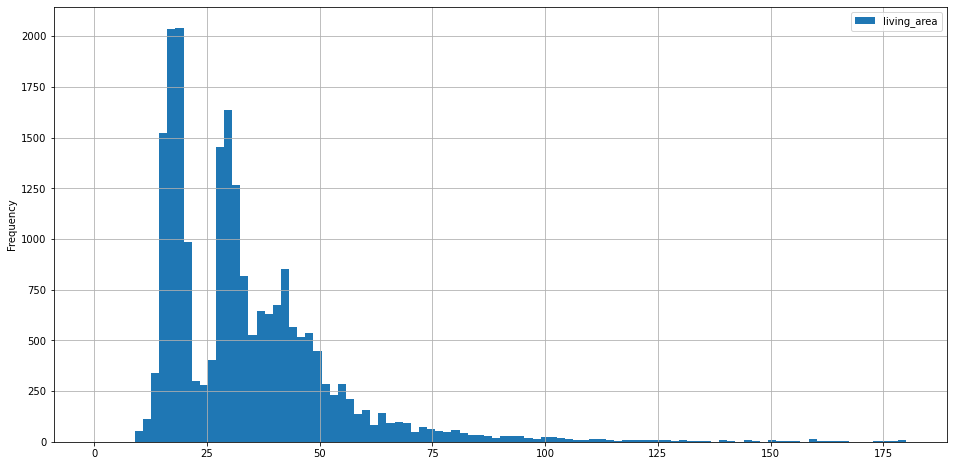

In [36]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid = True, range = (0, 180), figsize = (16, 8)) # построим гистограмму по значениям столбца
data['living_area'].describe() # выведем описательную статистику
# из графика можно уидеться два пика, 18 и 30 кв.м. и есть провал на 24 кв. м. 

Изучение площади кухни:

count    21036.000000
mean        10.391387
std          5.155369
min          2.000000
25%          7.000000
50%          9.085000
75%         12.000000
max         50.000000
Name: kitchen_area, dtype: float64

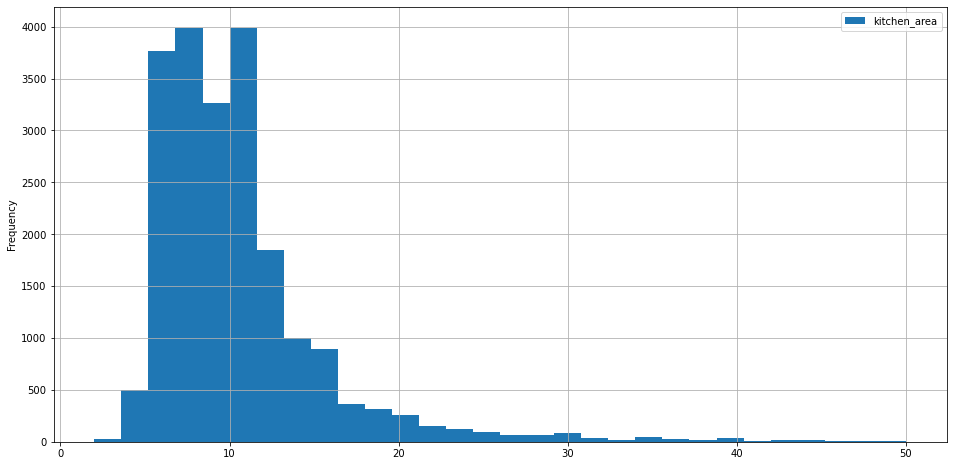

In [37]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 30, grid = True, figsize = (16, 8)) # построим гистограмму по значениям столбца
data['kitchen_area'].describe() # выведем описательную статистику
# распределение данных в целом нормальное, наиболее частая площадь находиться в диапазоне от 6 до 15 м., чем больше площадь, тем реже встречается такая кухня

Изучение цены объекта:

count    2.328000e+04
mean     6.260432e+06
std      7.754648e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

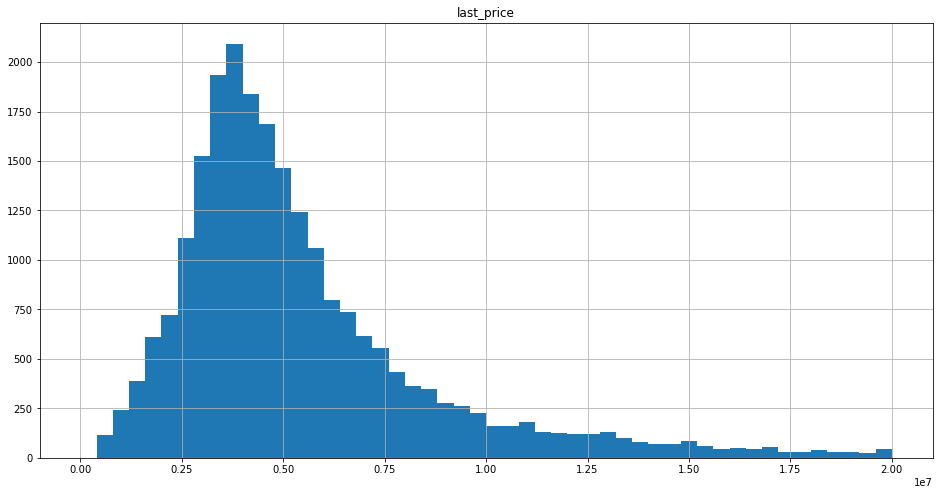

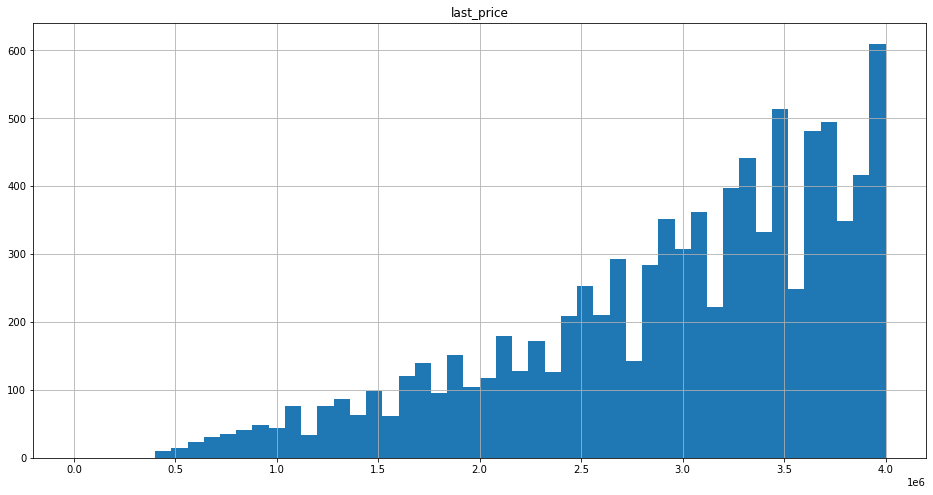

In [38]:
data.hist('last_price', bins = 50, range = (0, 2e+07), figsize = (16, 8)) # построим гистограмму по значениям столбца
data.hist('last_price', bins = 50, range = (0, 4e+06), figsize = (16, 8)) # построим гистограмму по значениям столбца
data['last_price'].describe() # выведем описательную статистику
# распределение данных в целом нормальное, но график немного "шумный", и виден "хвост" вправо - это элитная недвижимость

Изучение числа комнат:

count    23280.000000
mean         2.056959
std          1.046052
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

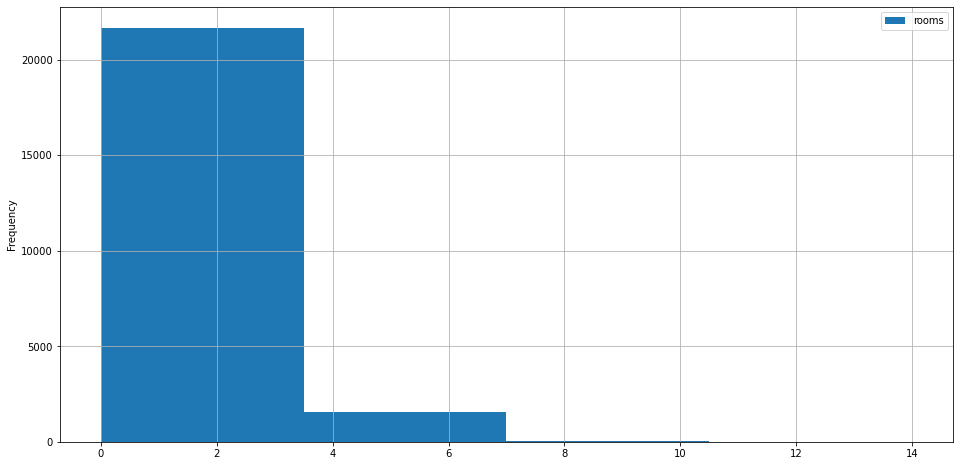

In [39]:
data.plot(y = 'rooms', kind = 'hist', bins = 4, grid = True, figsize = (16, 8))
data['rooms'].describe() # выведем описательную статистику
# больше всего квартир от одной до трех комнат

Изучение высоты потолков:

count    23196.000000
mean         2.703409
std          0.216649
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          4.000000
Name: ceiling_height, dtype: float64

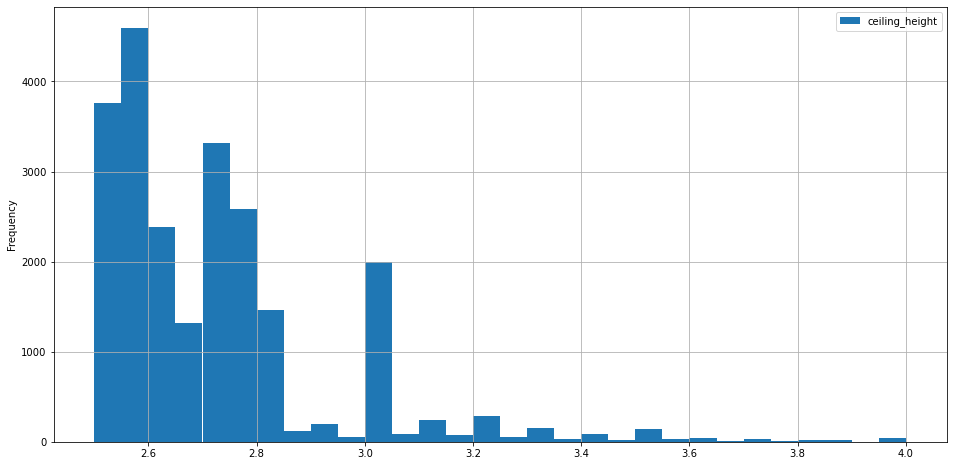

In [40]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid = True, figsize = (16, 8))
data['ceiling_height'].describe() # выведем описательную статистику
# из графика можно уидеть два пика, 2.5 и 3 м., что ожидаемо

Изучение этаж квартиры:

count    23280.000000
mean         5.885309
std          4.860933
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

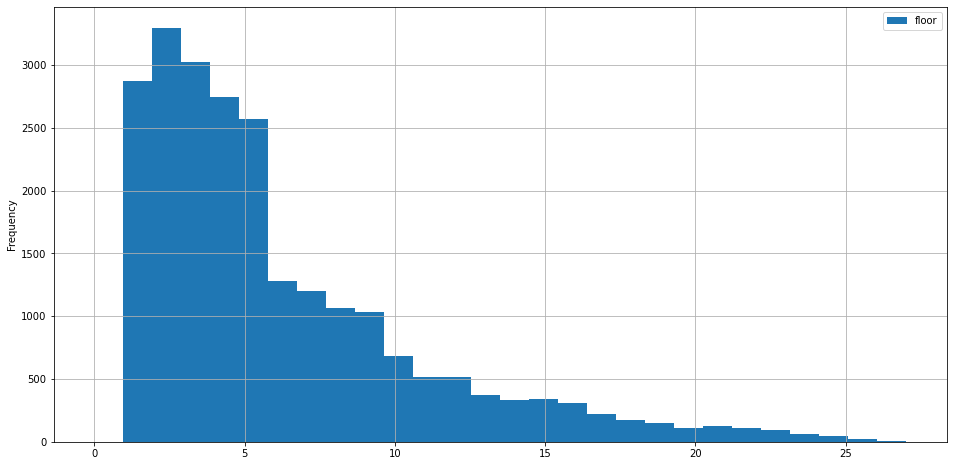

In [41]:
data.plot(y = 'floor', kind = 'hist', bins = 28, grid = True, range = (0, 27), figsize = (16, 8))
data['floor'].describe() # выведем описательную статистику
# из графика виден пик 2 этажа, а самый частые этажи находяться в диапозоне от 1 до 5

Изучения типа этажей квартиры:

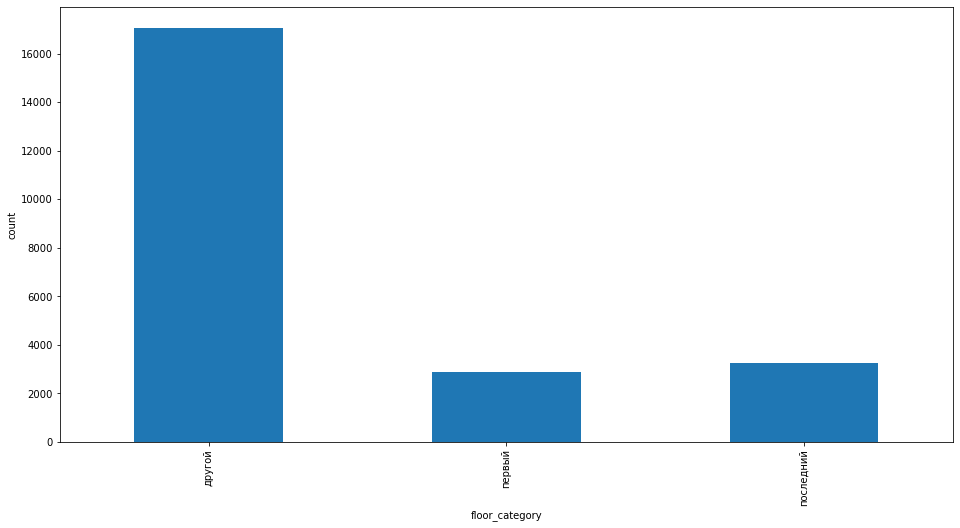

In [42]:
data.groupby(by = 'floor_category')['floor_category'].count().plot(kind = 'bar', ylabel = 'count', figsize = (16, 8));
# больше всего других этажей, что и следовало ожидать

Изучение общего количества этажей в доме:

count    23196.000000
mean        10.668176
std          6.536629
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

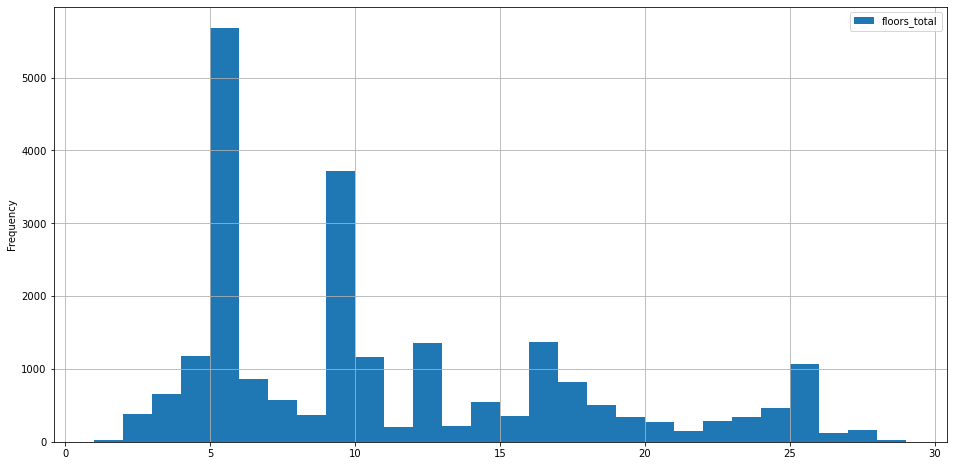

In [43]:
data.plot(y = 'floors_total', kind = 'hist', bins = 28, grid = True, figsize = (16, 8))
data['floors_total'].describe() # выведем описательную статистику
# видим явные пики пятиэтажных и девятиэтажных домов, а медиана в районе 11 этажей

Изучение расстояния до центра города в метрах:

count    17821.000000
mean     14236.301723
std       8582.060337
min        181.000000
25%       9364.000000
50%      13138.000000
75%      16293.000000
max      65952.000000
Name: city_centers_nearest, dtype: float64

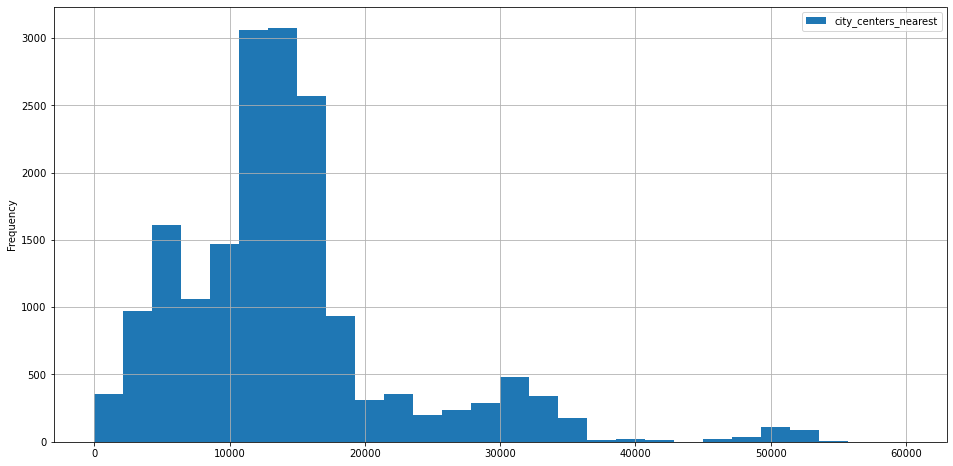

In [44]:
data.plot(y = 'city_centers_nearest', kind = 'hist', bins = 28, grid = True, range = (0, 60000), figsize = (16, 8))
data['city_centers_nearest'].describe() # выведем описательную статистику
# на графике можно увидеть пик в районе 12-14 км.

Изучение расстояния до ближайшего аэропорта:

count    17801.000000
mean     28823.842144
std      12664.810470
min          0.000000
25%      18503.000000
50%      26805.000000
75%      37348.000000
max      84853.000000
Name: airports_nearest, dtype: float64

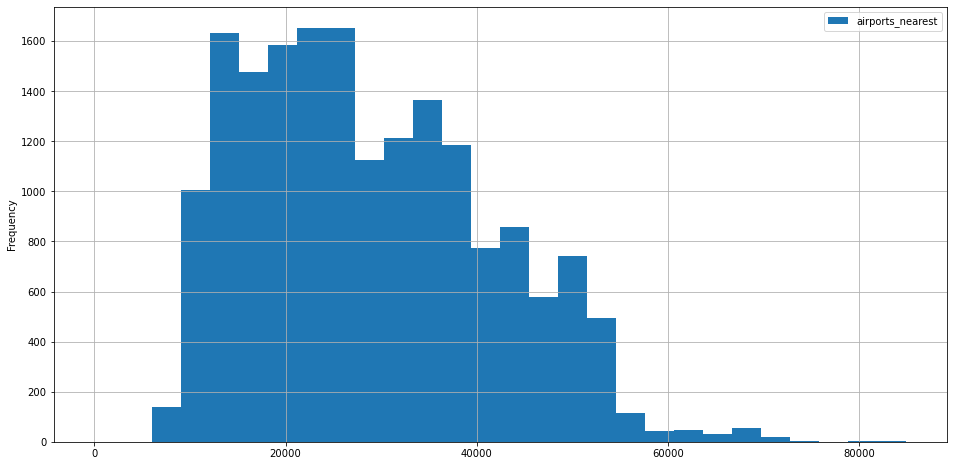

In [45]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 28, grid = True, figsize = (16, 8)) 
data['airports_nearest'].describe() # выведем описательную статистику
# на гистограмме данные очень "шумные", чем-то из далека похожи на нормальное распрделение  

Изучение расстояния до ближайшего парка:

count    7885.000000
mean      490.164870
std       340.037284
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

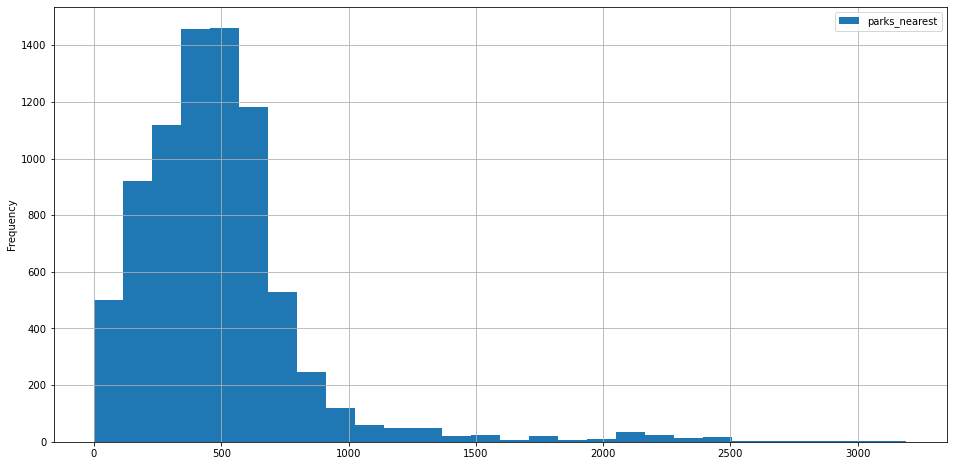

In [46]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 28, grid = True, figsize = (16, 8))
data['parks_nearest'].describe() # выведем описательную статистику
# исходя из гистограммы, больше всего квартир с парками на расстоянии до 750 м.

Изучение дня и месяца публикации объявления:

count    23280.000000
mean         2.572079
std          1.789386
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_publication, dtype: float64

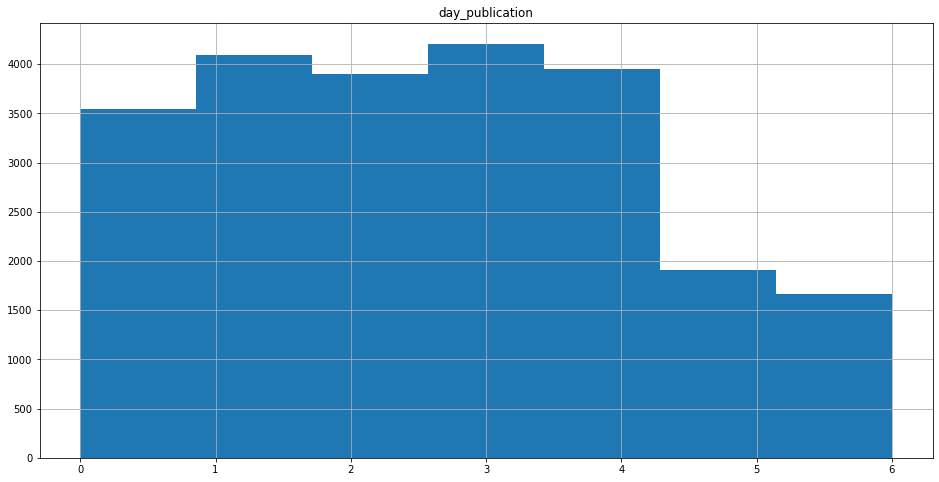

In [47]:
data.hist('day_publication', bins = 7, figsize = (16, 8))
data['day_publication'].describe() # выведем описательную статистику
# видим провал в публикации объявлений в субботу и воскресенье - это логично (в выходные реже продают квартиру, нежели в рабочие дни)

count    23280.000000
mean         6.398024
std          3.486610
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

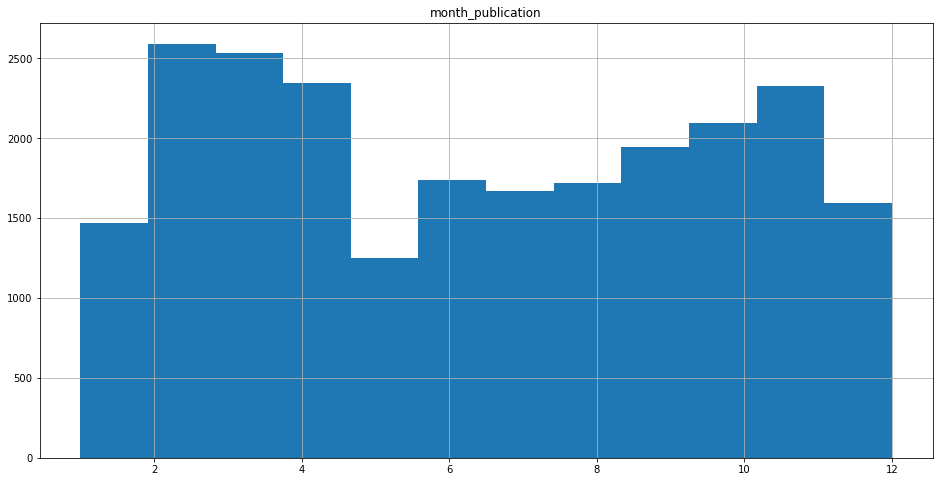

In [48]:
data.hist('month_publication', bins = 12, figsize = (16, 8))
data['month_publication'].describe() # выведем описательную статистику
# видим что с февраля по апрель наблюдалосась повышенная активность в продаже квартир. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае

**Выводы:**

Cтолбец общей площади (total_area): распределение данных в целом нормальное. Можно наблюдать очень малое количество квартир с площадью более 100 кв. м., а медиана равна в районе 59 кв. м. Логичный вывод, что чаще всего продаются квартиры с площадью до 100 кв. м., а все что более - это уже более элитная недвижимость, и спрос на нее меньше, как и предложений на рынке.

Столбец жилой площади (living_area): из графика сделан вывод, что самый популярные значения это: площадь 18 и 30 кв. м. И есть провал на 24 кв. м. Отсюда делается вывод, что квартиры, где жилая площадь от 10 до 23 кв. м. и от 26 до 50 кв. м. - являются самыми популярными и такие квартиры часто продаются. А провал в продажах на 24 кв. м. очень необычен, и скорее всего связан, с редкостью таких квартир. Мое предположение, что такие квартиры являются студиями, и их, очевидно, намного меньше, чем обычных квартир. 

Столбец площади кухни (kitchen_area): из графика сделан вывод, самая популярная площадь кухни находиться в диапазоне от 6 до 15 кв. м., чем больше площадь, тем реже встречается такая кухня. И на рынке большего всего предложений с нормальной площадью кухни.

Столбец цены объекта (last_price): данные похожи на нормальное распределение, только с хвостом вправо (увеличение цены) - это элитная недвижимость. А цена самых продаваемых квартир находиться в диапазоне от 3 до 6 млн. руб.

Столбец числа комнат (rooms): на рынке недвижимости больше всего квартир продается от одной до трех комнат, это самые ликвидные квартиры.

Столбец высоты потолков (ceiling_height): больше всего квартир с потолками 2.5 и 3 м соответственно. Это самые среднестатистические квартиры на рынке.

Столбец этаж квартиры (floor): самый частый этаж квартиры - это второй. А больше всего квартир находится в диапазоне от 1 до 5, так как это более старый дома, построенные еще во время СССР. И таких домов много в Москве, а в других городах еще больше.

Столбец типа этажей квартиры (floor_category): больше всего других этажей (т.е. не первый и не последний), этого и следовало ожидать.

Столбец общего количества этажей в доме (floors_total): самые популярные дома - это дома с пятью и девятью этажами, их большего всего на рынке недвижимости. Также часто, но уже меньше, встречаются и дома с 13, 17 и 26 этажами. Остальные тоже есть, но их намного меньше. 

Столбец расстояния до центра города в метрах (city_centers_nearest): пиковые значения находиться в диапазоне 12000-14000 м. до центра города, но из графика видно, всё же больше домов ближе к центру города, чем тех, которые дальше 14 км.

Столбец расстояния до ближайшего аэропорта (airports_nearest): данные немного похожи на нормальное распределение, медиана равна 28 км. Самый большой спрос, на квартиры в диапазоне от 10 км до 40 км, но самые оптимальные квартиры от 5 до 10 км.

Столбец расстояния до ближайшего парка (floor_category): исходя из гистограммы большего всего квартир с парками на расстоянии до 750 м. Считаю, что чем ближе парк, тем лучше и быстрее квартира будет продаваться, но естественно, это не единственный фактор.

Столбцы дня и месяца публикации объявления (day_publication и month_publication): видим провал в публикации объявлений в субботу и воскресенье - это логично (в выходные реже продают квартиру, нежели в рабочие дни). Также можно увидеть, что с февраля по апрель наблюдалась повышенная активность в продаже квартир. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

**Изучение, как быстро продавались квартиры (столбец days_exposition):**

count    23280.000000
mean       148.550773
std        192.850090
min          0.000000
25%         22.000000
50%         72.000000
75%        193.000000
max       1095.000000
Name: days_exposition, dtype: float64

0       3140
45       871
60       536
7        231
30       206
        ... 
866        1
937        1
1015       1
964        1
971        1
Name: days_exposition, Length: 1003, dtype: int64

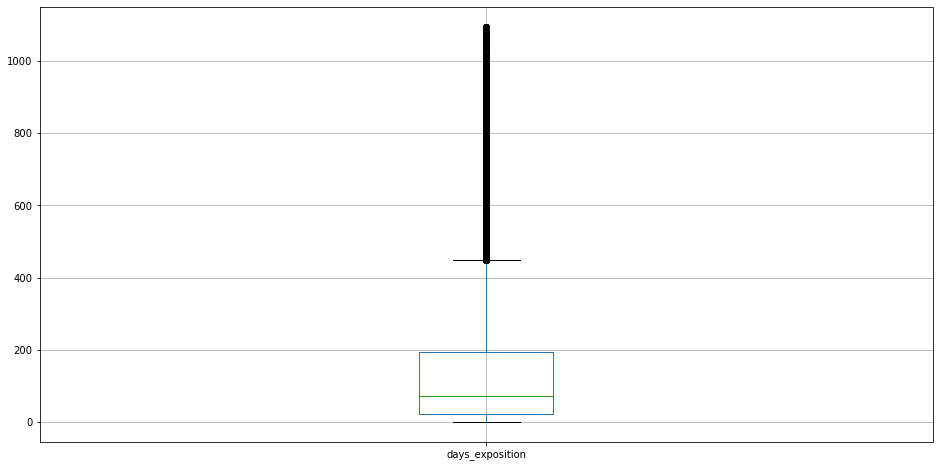

In [59]:
data.boxplot(column = 'days_exposition', figsize = (16, 8)) # построение диаграммы размаха
display(data['days_exposition'].describe()) # посмотрим основные статистические характеристики
display(data['days_exposition'].value_counts()) # посмотрим уникальные значения в датафрейме данных

Исходя из диаграммы размаха, можно сделать вывод, что медианное значение дней продажи квартир равно 72. Первый квартиль равен 22, а третий 193 дням. Среднее значение приблизительно равно 148 дням. А данные смещены вправо, и обнаружены выбивающиеся значения это: 7, 30, 45, 60, 90.

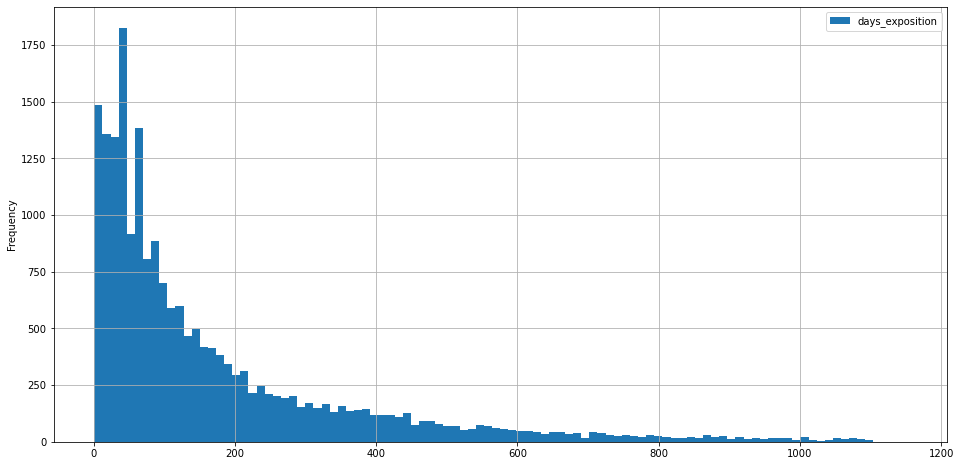

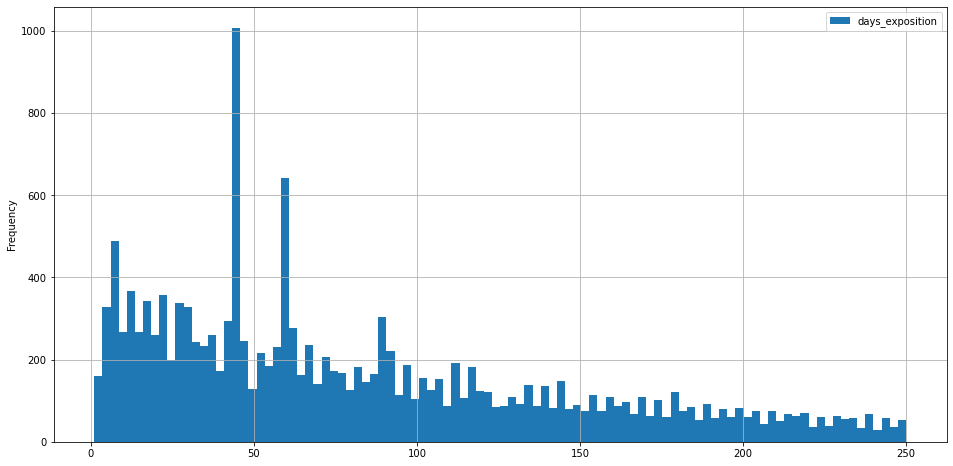

In [58]:
# построим две гистограммы для наглядности
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1, 1150), figsize = (16, 8)); # гистограмма обшей картиной всех значений дней продажи квартиры
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1, 250), figsize = (16, 8)); # гистограмма диапазона, где больше всего продалось квартир

**Вывод:** исходя из гистограммы, данные смещены вправо. Среднее значение равно 148 дня, а медиана равна 72 дням. Построив гистограммы, обнаружили аномалии на 7, 30, 45, 60, 90 днях - это наиболее популярное количество дней до снятия объявления. Очень необычные цифры, первое - это неделя, а остальные кратны 15. Я предположу, что на эти временные промежутки выкладываются объявления, и если их не продлевать, то они автоматически закрываются. Т.е. считать эти числа самыми популярными днями продажи квартиры - не стоит.
Я бы предложил считать быстрые продажи квартиры до 100 дней, так как на этом промежутке продалось больше всего квартир и это число является приблизительно средним между медианой и средним арифметическим. А все продажи более 200 дней - считать долгими.

**Изучение факторов которые больше всего влияют на общую (полную) стоимость объекта:**

Вычислим корреляцию между факторами и стоимостью объекта:

In [51]:
# для вычисления корреляции для типа этажа необходимы численные значения столбца, поэтому создадим новый столбец floor_category_num, где первый этаж будет отмечен цифрой 1, последний - 2, другой - 0.
def floor_category_num(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 1
    elif floor == floors_total:
        return 2
    elif 1 < floor < floors_total:
        return 0

data['floor_category_num'] = data.apply(floor_category_num, axis = 1)

In [52]:
# создадим список столбцов по которым будем вычислять корреляцию
list_columns = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'floor_category_num', 'day_publication', 'month_publication', 'year_publication']
# далее создадаим цикл, который будет проходить по каждому столбцу созданного списка 
for column in list_columns:
    correlation = data['last_price'].corr(data[column]) # вычисление корреляции
    print(f'Корреляция между стоимостью объекта и {column} составляет: {correlation:.2f}') # по каждому столбцу сделаем вывод следующего вида, и округлим корреляцию до двух знаков после запитой

Корреляция между стоимостью объекта и total_area составляет: 0.69
Корреляция между стоимостью объекта и living_area составляет: 0.59
Корреляция между стоимостью объекта и kitchen_area составляет: 0.49
Корреляция между стоимостью объекта и rooms составляет: 0.39
Корреляция между стоимостью объекта и floor составляет: 0.03
Корреляция между стоимостью объекта и floor_category_num составляет: -0.03
Корреляция между стоимостью объекта и day_publication составляет: -0.00
Корреляция между стоимостью объекта и month_publication составляет: -0.00
Корреляция между стоимостью объекта и year_publication составляет: -0.04


Из результатов можно сделать следующий вывод: есть прямая корреляция между стоимостью объекта и площадью квартиры (total_area), она составляет наибольшее значение - это 0.69. Также есть чуть менее зависимость от жилой площади (living_area) она равна 0.59, корреляция с площадью кухни равна 0.49 и зависимость от количества комнат (rooms) равна 0.39. Корреляция между полной стоимостью объекта и типом этажа (floor_category_num), а также этажом (floor) квартиры минимальная (равна +-0.03). И корреляция между полной стоимостью объекта и днем публикации (day_publication), месяцем (month_publication), годом публикации (year_publication) - отсутствует.

Построим диаграммы рассевания для наглядной представления зависимости, между значениями для которых имеется корреляция:

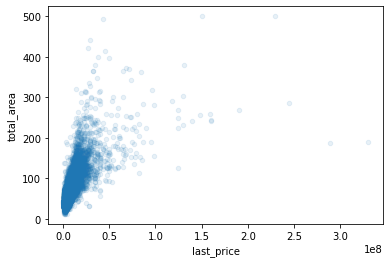

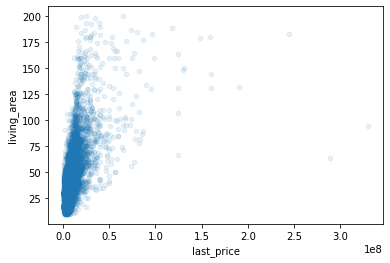

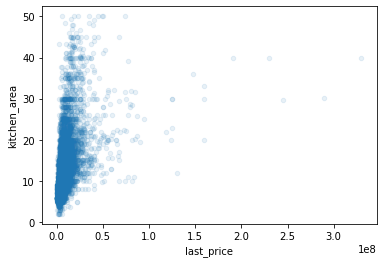

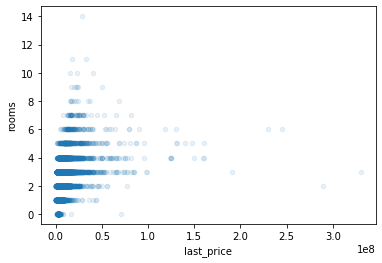

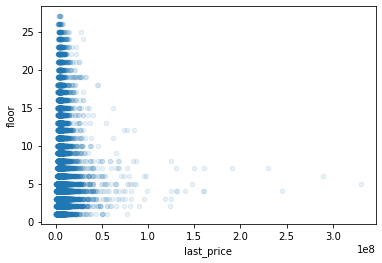

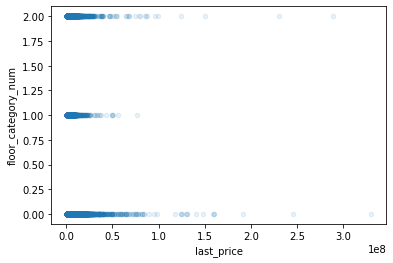

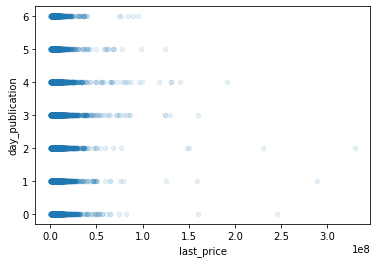

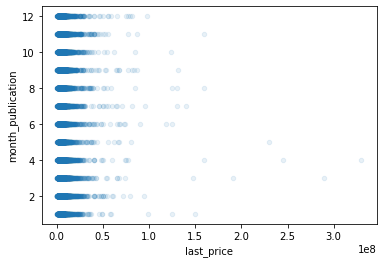

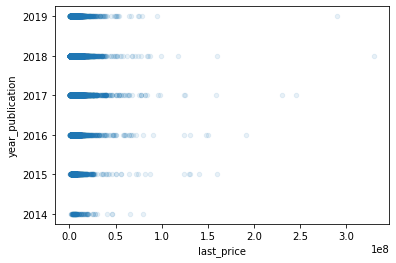

In [53]:
data.plot(x = 'last_price', y = 'total_area', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для площади квартиры
data.plot(x = 'last_price', y = 'living_area', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для жилой площади
data.plot(x = 'last_price', y = 'kitchen_area', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для площади кухни 
data.plot(x = 'last_price', y = 'rooms', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для количества комнат
data.plot(x = 'last_price', y = 'floor', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для этажа
data.plot(x = 'last_price', y = 'floor_category_num', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для типа этажа
data.plot(x = 'last_price', y = 'day_publication', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для дня публикации
data.plot(x = 'last_price', y = 'month_publication', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для месяца публикации
data.plot(x = 'last_price', y = 'year_publication', kind = 'scatter', alpha = 0.1); # построение диаграммы рассевания для года публикации

**Вывод:**

Наибольшая прямая корреляция между ценой квартиры и площадью квартиры, также есть чуть меньшая зависимость от жилой площади, площади кухни и количества комнат. Что видно из вычисленной корреляции:
для площади квартиры она равна 0.69;
для жилой площади квартиры она равна 0.59;
для площади кухни квартиры она равна 0.49;
для количества  комнат квартиры она равна 0.4. Что также наглядно видно и из построенных диаграмм рассевания.
Цена практически не зависит от этажа, на котором расположена квартира, и типа этажа ("первый", "последний", "другой"), она равна 0.03. Можно сказать, что зависимости нет. И стоимость объекта вовсе не зависит от дня, месяца и года публикации объявления.

**Вычисление средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**

In [54]:
top_localities = data['locality_name'].value_counts().head(10)
top_locality_names = list(top_localities.index)

In [55]:
top_ten_localities = data['locality_name'].value_counts().head(10) # получим насиленные пункты с наибольшим числом объявлений
display(top_ten_localities) # выведем результаты

санкт-петербург      15397
поселок мурино         553
поселок шушары         438
всеволожск             394
пушкин                 357
колпино                336
поселок парголово      325
гатчина                307
деревня кудрово        298
выборг                 234
Name: locality_name, dtype: int64

Больше всего объявлений в Санкт-Петербурге, а замыкает топ 10 город - Выборг.

,цена за квадратый метр
locality_name,
санкт-петербург,113825.394882
пушкин,102898.361345
деревня кудрово,92453.882550
поселок парголово,90132.089231
поселок мурино,85711.231465
поселок шушары,78661.100457
колпино,75421.345238
гатчина,68745.693811
всеволожск,68690.324873


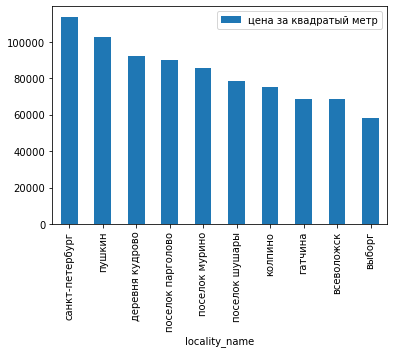

In [56]:
# вычислим среднею цену одного квадратного метра для 10 населённых пунктах с наибольшим числом объявлений
top_ten_localities_names = list(top_ten_localities.index)
top_price_per_km = data.query(f'locality_name in @top_ten_localities_names').pivot_table(index = 'locality_name', values = 'price_per_square_meter').sort_values(by = 'price_per_square_meter', ascending = False)
top_price_per_km.columns = ['цена за квадратый метр'] # переименуем столбец
display(top_price_per_km) # выведем датафрейм на экран
top_price_per_km.plot(kind = 'bar'); # построим график для наглядности результатов

**Вывод:** как и ожидалось, больше всего объявлений о продажи недвижимости в Санкт-Петербурге, а также там наибольшая цена за квадратный метр и равна 114 тыс. руб. Дальше идет город Пушкин и т.д. С топом можно ознакомиться на построенном графике.

**Выделение квартир в Санкт-Петербурге и вычисление средней цены каждого километра:**

,средняя цена за километр
city_centers_nearest_km,
0.0,2.113931e+07
1.0,1.825508e+07
2.0,1.472507e+07
3.0,1.134976e+07
4.0,1.245393e+07
5.0,1.330234e+07
6.0,1.413184e+07
7.0,1.110981e+07
8.0,8.377037e+06


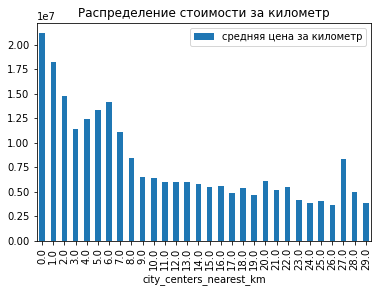

In [57]:
# создадим сводную таблицу, сгруппируем по городу "санкт-петербург" и вычислим среднюю цену каждого километра
saint_petersburg_price_per_km = data[data['locality_name'] == 'санкт-петербург'].pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'mean')
saint_petersburg_price_per_km.columns = ['средняя цена за километр'] # переименуем столбец
saint_petersburg_price_per_km.plot(kind = 'bar', title = 'Распределение стоимости за километр'); # построим график для наглядности результатов
display(saint_petersburg_price_per_km) # выведем датафрейм на экран

**Вывод:** из графика и полученных результатов, можно заметить, что самая дорогая недвижимость находится до 1 км. И потом цена снижается. Но также есть необычные пики, самые выраженный это на расстоянии 27 км. Я бы предположил, что на данном расстоянии находиться богатый район, с более дорогими квартирами.

# Общий вывод:

**В результате проделанной работы можно сделать следующие выводы:**
1. быстрые продажи квартиры до 100 дней, а все продажи более 200 дней - долгие;
2. наибольшие факторы влиящие на стоимость недвижимости это: площадь квартиры, площадь кухни, количество комнат. И почти не влияет на цену этаж, на котором расположена квартира. И стоимость объекта вовсе не зависит от дня, месяца и года публикации объявления;
3. больше всего объявлений о продажи недвижимости в Санкт-Петербурге, а также там наибольшая цена за квадратный метр и равна 114 тыс. руб
4. в 27 км от центра Санкт-Петербурга есть недвижимость по цене почти равная цене недвижимости в 8 км. от центра;
5. возможно работать с данными и получать адекатные результаты, где есть пропущенные значения и выбросы. Но надо их очистить от выбросов и избавиться от пропусков.
**По ходу выполнения проекта было сделано:**
1. изучены данные;
2. определены пропущенные значения;
3. заполнены пропущенные значения, там где это возможно (есть пояснения);
4. изменены типы значений в некоторых столбцах;
5. устранены аномалии в данных;
6. устранены дубликаты;
7. посчитано и добавлено в таблицу: 
   - цена одного квадратного метра;
   - день публикации объявления (0 - понедельник, 1 - вторник и т.д.) ;
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «первый», «последний», «другой»);
   - расстояние в км до центра города.
8. изучены и описаны следующие параметры: 
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления
9. построены гистограммы для каждого параметра;
10. посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра;
11. выяснено какие факторы больше всего влияют на общую (полную) стоимость объекта? Построены графики, которые показывают зависимость цены от указанных параметров;
12. выделены квартиры в Санкт-Петербурге и вычислена средняя цена каждого километра. Описаны, как стоимость объектов зависит от расстояния до центра города;
13. после каждого этапа написаны промежуточные выводы;
14. написан общий вывод по проекту.